## 과제
### Q. 고객 구매데이터 생성(id, 성별, 연령, 지역, 상품, 가격, 구매시간) 하고 데이터 프레임으로 변환한 후 아래 사항을 수행하세요.
#### 구매 데이터 생성
- id : 1번 ~ 1000번 일련번호(관측치 1000개)
- gender : 0,1 정수 난수 생성
- age : 10 ~ 80사이 정수 난수를 생성하고 범주화하여 age_cat 파생
- region : 1 ~ 10 사이 정수 난수 생성
- product : 1개 제품 이상
- price_avg_19 : 1000 ~ 50000 사이 실수 난수 생성하고 범주화하여 price_avg_cat 파생
- price_avg_20 : 1000 ~ 50000 사이 실수 난수 생성하고 범주화하여 price_avg_cat 파생
- qty_19 : 1 ~ 100 사이 정수 난수 생성하여('19년 구매 수량) 
- qty_20 : 1 ~ 100 사이 정수 난수 생성하여('20년 구매 수량)
- time_19 : 01 ~ 24 사이 정수 난수 생성하고 오전, 오후, 야간 으로 범주화하여 time_cat_19 파생('19년에 가장 자주 구매한 시간대)
- time_20 : 01 ~ 24 사이 정수 난수 생성하고 오전, 오후, 야간 으로 범주화하여 time_cat 파생('20년에 가장 자주 구매한 시간대)
- 구매액은 price * qty로 산출('19년, '20년 각각 계산)하여 pur_19, pur_20 컬럼으로 생성 
- 종속변수(결과변수)는 (pur_20 - pur_19)으로 계산하여 구매액 증감을 0(감소), 1(증가)로 범주화하여 pur_gap 컬럼 생성
- np.nan으로 각 컬럼별로 10개씩 null값을 삽입하고 각 칼럼의 특성을 고려한 null 값 처리

#### 인사이트 도출
- 통계적 분석 및 시각화하여 탐색한 후 불필요한 컬럼은 삭제하고 필요시 추가 파생변수 생성한 후 분석용 데이터셋을 작성하고 인사이트 3개 이상 도출
- 인사이트 도출하지 못한 경우 데이터를 수정하여 다시 탐색한 후 인사이트 도출 및 기술

#### 데이터 수정시 참조
- 구매액 증감에 영향을 주는 주요 요인과 관련된 인사이트를 만들 수 있는 데이터로 변경하는 점에 중점을 둠
- 구매 감소한 고객의 특성으로 성별, 지역, 선호제픔, 선호 구매시간대, 평균 구매가 level(저가, 중가, 고가)별로 데이터 수정
- 연령, 성별로 상품유형, 구매단가, 구매시간대 등을 복합적으로 그룹화하여 데이터 특성 부여
- 연도별로 상기한 사항들의 변동과 구매 감소간의 상관성을 부여하는 데이터 수정
- 데이터 수정은 불린 인덱싱으로 특정 그룹을 선택한 후 고객 특성에 맞는 값으로 변경
                                                                

In [1]:
# import module
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')

plt.style.use('seaborn-dark')
%config InlineBackend.figure_format = 'retina'
pd.options.display.max_rows = 20
pd.options.display.max_columns = 20

plt.rcParams['figure.figsize'] = [20, 10] # [width, height] (inches)

#### 구매 데이터 생성

In [2]:
np.random.seed(0)
# id : 1번~ 1000번 일련번호 생성. 관측지 (1000개)
id_ = np.random.randint(1,1001,size=1000) # len(ID) # 1000

# gender : 0,1 정수 난수 생성 
gender = np.random.randint(2,size=1000) 

# age : 10 ~ 80사이 정수 난수를 생성
age = np.random.randint(10,81,size=1000)

# region : 1 ~ 10 사이 정수 난수 생성
region = np.random.randint(1,11,size=1000)

# product : 1개 이상 (A,B,C ~ 1,2,3)
product = np.random.randint(1,4,size=1000)

# price_avg_10 : 1000 ~ 50000 사이 실수 난수 생성 # 19년도 가격
price_19 = np.random.uniform(1000,50001,size=1000)
# price_19_2 = np.random.uniform(1000,50001)
# price_19_3 = np.random.uniform(1000,50001)
# price_19_4 = np.random.uniform(1000,50001)
# price_19_5 = np.random.uniform(1000,50001)

#price_avg_20 = 1000 ~ 50000 사이 실수 난수 생성 # 20년도 가격
price_20 = np.random.uniform(1000,50001,size=1000)
# price_20_2 = np.random.uniform(1000,50001)
# price_20_3 = np.random.uniform(1000,50001)
# price_20_4 = np.random.uniform(1000,50001)
# price_20_5 = np.random.uniform(1000,50001)

#qty_19 : 01 ~ 100 사이 정수 난수 생성
qty_19 = np.random.randint(1,101,size=1000)

#qty_20 : 01 ~ 100 사이 정수 난수 생성
qty_20 = np.random.randint(1,101,size=1000)

#time_19 : 01 ~ 24 정수 난수 생성
time_19 = np.random.randint(1,25,size=1000)

#time_20 : 01 ~ 24 정수 난수 생성
time_20 = np.random.randint(1,25,size=1000)

# #pur_19 : price_avg_19 * qty_19
# pur_19 = price_19 * qty_19

# #pur_20 : price_avg_20 * qty_20
# pur_20 = price_20 * qty_20


In [3]:
data = pd.DataFrame({'id':id_,'gender':gender,'age':age,'region':region,
                    'product':product,'qty_19':qty_19,'qty_20':qty_20,
                    'time_19':time_19,'time_20':time_20,
                    })
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   id       1000 non-null   int32
 1   gender   1000 non-null   int32
 2   age      1000 non-null   int32
 3   region   1000 non-null   int32
 4   product  1000 non-null   int32
 5   qty_19   1000 non-null   int32
 6   qty_20   1000 non-null   int32
 7   time_19  1000 non-null   int32
 8   time_20  1000 non-null   int32
dtypes: int32(9)
memory usage: 35.3 KB


In [4]:
data.head()

,id,gender,age,region,product,qty_19,qty_20,time_19,time_20
0,685,0,66,6,2,38,90,8,11
1,560,1,75,4,2,19,30,13,10
2,630,0,17,9,3,74,16,15,19
3,193,0,79,10,1,37,4,9,17
4,836,0,25,1,2,68,52,2,11


In [5]:
# Random 결측값 추가
for col in data.columns:
    data.loc[data.sample(n=10).index,col] = np.nan

In [6]:
data.info()            # nan값이 들어가면서 실수형으로 변화.
                       # 결측치 처리를 해야 int로 변화 가능 (그때 dollar와 마찬가지)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       990 non-null    float64
 1   gender   990 non-null    float64
 2   age      990 non-null    float64
 3   region   990 non-null    float64
 4   product  990 non-null    float64
 5   qty_19   990 non-null    float64
 6   qty_20   990 non-null    float64
 7   time_19  990 non-null    float64
 8   time_20  990 non-null    float64
dtypes: float64(9)
memory usage: 70.4 KB


### columns 정리 

In [7]:
# 결측값 확인
print(data.isnull().sum()) #각각 10개씩 들어가 있음.

id         10
gender     10
age        10
region     10
product    10
qty_19     10
qty_20     10
time_19    10
time_20    10
dtype: int64


###### product 
    column 당 10개씩의 결측값이 생성됨.
    차후 정리할 id / age / region / price / qty보다
    제일 먼저 정리해야할 column 인
    'Product'를 가장 먼저 정리를 해야한다고 판단.

In [8]:
# 가장 먼저 결측값 처리를 해야할 column 'product'를 정리함.
# product는 1,2,3으로 구성되어 있기 떄문에, mean이나 median같은 함수를 사용할 수 없음.
# 따라서 ffill / bfill과 같은 함수를 사용해서 결측값을 처리함.

print(data[data['product'].isna()]) # 10가지의 nan행을 출력

data['product'] = data['product'].replace(np.nan,np.random.randint(1,4))

# product열의 결측값 (np.nan) 을 랜덤으로 잡아줌.

        id  gender   age  region  product  qty_19  qty_20  time_19  time_20
44   798.0     0.0  46.0     8.0      NaN    53.0    76.0      9.0     20.0
216  783.0     0.0  46.0     9.0      NaN    77.0    73.0     21.0      6.0
364  115.0     1.0  78.0    10.0      NaN    65.0    51.0     24.0     18.0
370  274.0     0.0  18.0     6.0      NaN    57.0    28.0      4.0      2.0
609  370.0     1.0  49.0     3.0      NaN    10.0     3.0     17.0      1.0
760  416.0     1.0  30.0     4.0      NaN    88.0    54.0     15.0      7.0
802  989.0     1.0  50.0     1.0      NaN    14.0    87.0      8.0     13.0
819  251.0     0.0  73.0     2.0      NaN    22.0    77.0     15.0     14.0
851  314.0     1.0  67.0     4.0      NaN    79.0    23.0     10.0     14.0
859  699.0     1.0  56.0     4.0      NaN    56.0    16.0     19.0     23.0


In [9]:
#검증
print(data['product'].isnull().sum()) 

#dtype변경 float -> int
data['product'] = data['product'].astype('int')

0


In [10]:
data[['product']].head()

,product
0,2
1,2
2,3
3,1
4,2


In [11]:
data.isnull().sum() 

id         10
gender     10
age        10
region     10
product     0
qty_19     10
qty_20     10
time_19    10
time_20    10
dtype: int64

###### age

    age : 10 ~ 80사이 정수 난수를 생성하고 범주화하여 age_cat 파생

In [12]:
print(data['age'].isnull().sum())
data['age'] = data['age'].fillna(data['age'].median()) #중간값으로 채워줌.
print(data['age'].isnull().sum())

10
0


In [13]:
data['age'].isnull().sum() # 결측값 없음
data['age'].unique() #모두 실수형
data['age'] = data['age'].astype('int') #정수형으로 변화

In [14]:
#카테고리 생성. 20세 별로 총 4범주로 나눠줌.
def a_cat(x):
    cat = ''
    if x < 20:
        cat = 'child'
    elif 20 <= x < 40:
        cat = 'young_adult'
    elif 40 <= x < 60:
        cat = 'adult'
    else:
        cat = 'elderly'
    return cat
        
data['age_cat'] = data['age'].apply(lambda x : a_cat(x))

In [15]:
data[['age','age_cat']].head()

,age,age_cat
0,66,elderly
1,75,elderly
2,17,child
3,79,elderly
4,25,young_adult


In [16]:
#검증
print(data['age'].isnull().sum()) 
data.isnull().sum() 

0


id         10
gender     10
age         0
region     10
product     0
qty_19     10
qty_20     10
time_19    10
time_20    10
age_cat     0
dtype: int64

###### id
    id는 빠르게 ffill로 결측값 채워줌.

In [17]:
data[data['id'].isnull()]
data['id'] = data['id'].fillna(method='ffill')
data['id'] = data['id'].astype('int')

In [18]:
data[['id']].head()

,id
0,685
1,560
2,560
3,193
4,836


In [19]:
data.isnull().sum() 

id          0
gender     10
age         0
region     10
product     0
qty_19     10
qty_20     10
time_19    10
time_20    10
age_cat     0
dtype: int64

###### Gender
    gender는 replace로 결측값 채워줌.

In [20]:
data[data['gender'].isnull()]

,id,gender,age,region,product,qty_19,qty_20,time_19,time_20,age_cat
303,149,NaN,12,10.0,3,41.0,1.0,16.0,23.0,child
383,92,NaN,13,1.0,2,79.0,15.0,21.0,16.0,child
540,613,NaN,42,1.0,1,83.0,72.0,3.0,16.0,adult
600,843,NaN,66,5.0,2,79.0,52.0,17.0,11.0,elderly
724,52,NaN,63,3.0,1,71.0,13.0,9.0,3.0,elderly
780,121,NaN,68,3.0,2,24.0,55.0,5.0,10.0,elderly
783,710,NaN,39,2.0,3,63.0,19.0,15.0,12.0,young_adult
939,305,NaN,19,8.0,2,11.0,55.0,3.0,21.0,child
951,91,NaN,10,4.0,1,62.0,28.0,21.0,15.0,child
977,235,NaN,47,NaN,3,87.0,68.0,6.0,21.0,adult


In [21]:
data['gender'] = data['gender'].replace(np.nan,np.random.randint(2))
data['gender'] = data['gender'].astype('int')
data[['gender']]

,gender
0,0
1,1
2,0
3,0
4,0
...,...
995,0
996,1
997,0
998,0


In [22]:
data.isnull().sum()

id          0
gender      0
age         0
region     10
product     0
qty_19     10
qty_20     10
time_19    10
time_20    10
age_cat     0
dtype: int64

###### region
    region은 이번엔 bfill로  결측값 채워줌.

In [23]:
display(data[data['region'].isnull()].head())
data['region'] = data['region'].fillna(method='bfill')
data['region'] = data['region'].astype('int')

,id,gender,age,region,product,qty_19,qty_20,time_19,time_20,age_cat
7,360,0,44,NaN,1,64.0,22.0,7.0,22.0,adult
101,85,0,58,NaN,1,3.0,58.0,12.0,1.0,adult
361,872,1,32,NaN,1,94.0,54.0,6.0,9.0,young_adult
391,711,1,55,NaN,2,83.0,51.0,21.0,2.0,adult
452,277,0,54,NaN,2,36.0,82.0,23.0,13.0,adult


In [24]:
#검증 
display(data[['region']].head())
data.isnull().sum()

,region
0,6
1,4
2,9
3,10
4,1


id          0
gender      0
age         0
region      0
product     0
qty_19     10
qty_20     10
time_19    10
time_20    10
age_cat     0
dtype: int64

###### qty_19 / 20 
    qty의 결측값은 replace 로  결측값 채워줌.

In [25]:
data['qty_19'] = data['qty_19'].replace(np.nan,np.random.randint(1,101))
data['qty_19'] = data['qty_19'].astype('int')
data['qty_20'] = data['qty_20'].replace(np.nan,np.random.randint(1,101))
data['qty_20'] = data['qty_20'].astype('int')

###### time_19 / 20 
    time의 결측값은 replace 로  결측값 채워줌.

In [26]:
data['time_19'] = data['time_19'].replace(np.nan,np.random.randint(1,25))
data['time_19'] = data['time_19'].astype('int')
data['time_20'] = data['time_20'].replace(np.nan,np.random.randint(1,25))
data['time_20'] = data['time_20'].astype('int')

In [27]:
# qty/time 및 총 검증
data.isnull().sum()

id         0
gender     0
age        0
region     0
product    0
qty_19     0
qty_20     0
time_19    0
time_20    0
age_cat    0
dtype: int64

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       1000 non-null   int32 
 1   gender   1000 non-null   int32 
 2   age      1000 non-null   int32 
 3   region   1000 non-null   int32 
 4   product  1000 non-null   int32 
 5   qty_19   1000 non-null   int32 
 6   qty_20   1000 non-null   int32 
 7   time_19  1000 non-null   int32 
 8   time_20  1000 non-null   int32 
 9   age_cat  1000 non-null   object
dtypes: int32(9), object(1)
memory usage: 43.1+ KB


###### time 19/20
    time 범주화 생성 ( 3개 - 오전/오후/야간)

In [29]:
def t_cat(x):
    cat=''
    if 4 <= x < 12:
        cat = '오전'
    elif 12<= x < 20:
        cat = '오후'
    else:
        cat = '야간'
    return cat

data['time_cat_19'] = data['time_19'].apply(lambda x : t_cat(x))
data['time_cat_20'] = data['time_20'].apply(lambda x : t_cat(x))

In [30]:
data.head(1)

,id,gender,age,region,product,qty_19,qty_20,time_19,time_20,age_cat,time_cat_19,time_cat_20
0,685,0,66,6,2,38,90,8,11,elderly,오전,오전


##### Price
    하나의 열 값에 총 3가지의 요소가 들어가야됨.
    그렇다면 product별로 DF를 나누고
    해당 product에 대한 price_19/price_20을 난수로 설정 (요소개수 상이하니 맞춰서)
    * 그렇다면 해당 product의 가격이 설정되었으니
    id별로 price_19 * qty_19  = total_price_19 / 20 이 설정됨. = product별 pur_19 값 생성
    * price_avg_ 값은 해당 df의 총 price_19 / 20 의 합을 df의 총 개수로 나눠주면 됨.
    data['price_19'].sum() / len(df1.index) = price_avg_
    * price_avg_ 가 생성되었으면 price_cat_19 / 20 의 범주화 설정 가능.
    고가 / 평균가 / 저가 로 판단이 됨. 각각 id별로
    * 총 만들어진 3개의 DF는 같은 열을 갖고 있는 DF가 됨.
    --> merge_outer로 3개를 병합하면,
    특정 조건에 맞는 행과 열에 값이 추가되어
    하나의 DF로 볼 수 있음.

In [31]:
# Product : 1 을 구매한 id만 
df1 = data[data['product'] == 1] #356개.
df1.head(1)

,id,gender,age,region,product,qty_19,qty_20,time_19,time_20,age_cat,time_cat_19,time_cat_20
3,193,0,79,10,1,37,4,9,17,elderly,오전,오후


In [32]:
df1['price_19'] = np.random.uniform(1000,50001,size=len(df1.index))
df1['price_20'] = np.random.uniform(1000,50001,size=len(df1.index))
# Warning이 뜨긴함.. ignore시킴. (copy value)

df1['price_19'] = df1['price_19'].round(0)
df1['price_19'] = df1['price_19'].astype('int')
df1['price_20'] = df1['price_20'].round(0)
df1['price_20'] = df1['price_20'].astype('int')

df1.head(1)

,id,gender,age,region,product,qty_19,qty_20,time_19,time_20,age_cat,time_cat_19,time_cat_20,price_19,price_20
3,193,0,79,10,1,37,4,9,17,elderly,오전,오후,4842,18850


In [33]:
# product 1의 pur_ 값 생성
df1['pur_19'] = df1['price_19'] * df1['qty_19']
df1['pur_20'] = df1['price_20'] * df1['qty_20']
df1.head(1)

,id,gender,age,region,product,qty_19,qty_20,time_19,time_20,age_cat,time_cat_19,time_cat_20,price_19,price_20,pur_19,pur_20
3,193,0,79,10,1,37,4,9,17,elderly,오전,오후,4842,18850,179154,75400


In [34]:
# product 1의 avg 값 생성
df1['price_avg_19'] = df1['price_19'].sum() / len(df1.index)
df1['price_avg_20'] = df1['price_20'].sum() / len(df1.index)

df1['price_avg_19'] = df1['price_avg_19'].round(2)
df1['price_avg_20'] = df1['price_avg_20'].round(2)

df1.head(3)

,id,gender,age,region,product,qty_19,qty_20,time_19,time_20,age_cat,time_cat_19,time_cat_20,price_19,price_20,pur_19,pur_20,price_avg_19,price_avg_20
3,193,0,79,10,1,37,4,9,17,elderly,오전,오후,4842,18850,179154,75400,24239.03,25937.54
5,764,1,62,8,1,6,24,22,12,elderly,야간,오후,39229,21240,235374,509760,24239.03,25937.54
6,708,1,42,3,1,61,96,22,24,adult,야간,야간,26085,37948,1591185,3643008,24239.03,25937.54


In [35]:
# 이거 진짜 무조건 외워야할듯.
# 내 머리속으로 논리가 없으면 컴퓨터를 활용하자
# 도수분포표 (histogram) 을 활용해서 3개로 category화 시킴
# price_avg_level == 평균 구매가 level로, 가격이 저/정/고 로 나누어서 3범위로 나눔
# 구매할 당시의 가격 level을 받음.
# 당시 가격이 정가의 범위에 있으면 정가 level. (평균값에서 +- 될듯.)

count, p_divs = np.histogram(df1['price_19'].dropna(),bins=3)
print(count,p_divs)
bin_names = ['저가','정가','고가']
df1['price_avg_level_19'] = pd.cut(x=df1['price_19'],
                                bins=p_divs,
                                labels = bin_names,
                                include_lowest=True)

[130 119 107] [ 1260.         17475.33333333 33690.66666667 49906.        ]


In [36]:
count, p_divs = np.histogram(df1['price_20'].dropna(),bins=3)
print(count,p_divs)
bin_names = ['저가','정가','고가']
df1['price_avg_level_20'] = pd.cut(x=df1['price_20'],
                                bins=p_divs,
                                labels = bin_names,
                                include_lowest=True)

[115 114 127] [ 1020. 17305. 33590. 49875.]


In [37]:
#검증
df1.head(1)

,id,gender,age,region,product,qty_19,qty_20,time_19,time_20,age_cat,time_cat_19,time_cat_20,price_19,price_20,pur_19,pur_20,price_avg_19,price_avg_20,price_avg_level_19,price_avg_level_20
3,193,0,79,10,1,37,4,9,17,elderly,오전,오후,4842,18850,179154,75400,24239.03,25937.54,저가,정가


In [38]:
def gap(x,y):
    cat = ''
    if y - x > 0:
        cat = 1
    else:
        cat = 0
    return cat

df1['pur_gap'] = df1.apply(lambda x :gap(x['pur_19'], x['pur_20']),axis=1)

In [39]:
#검증
df1.head(2)

,id,gender,age,region,product,qty_19,qty_20,time_19,time_20,age_cat,...,time_cat_20,price_19,price_20,pur_19,pur_20,price_avg_19,price_avg_20,price_avg_level_19,price_avg_level_20,pur_gap
3,193,0,79,10,1,37,4,9,17,elderly,...,오후,4842,18850,179154,75400,24239.03,25937.54,저가,정가,0
5,764,1,62,8,1,6,24,22,12,elderly,...,오후,39229,21240,235374,509760,24239.03,25937.54,고가,정가,1


이걸 2번 더해줍니다. product 2 / product 3
        
        망할

In [40]:
# Product : 2 구매한 id만 
df2 = data[data['product'] == 2] #356개.


df2['price_19'] = np.random.uniform(1000,50001,size=len(df2.index))
df2['price_20'] = np.random.uniform(1000,50001,size=len(df2.index))
# Warning이 뜨긴함.. ignore시킴. (copy value)


df2['price_19'] = df2['price_19'].round(0)
df2['price_19'] = df2['price_19'].astype('int')
df2['price_20'] = df2['price_20'].round(0)
df2['price_20'] = df2['price_20'].astype('int')


df2['pur_19'] = df2['price_19'] * df2['qty_19']
df2['pur_20'] = df2['price_20'] * df2['qty_20']



df2['price_avg_19'] = df2['price_19'].sum() / len(df2.index)
df2['price_avg_20'] = df2['price_20'].sum() / len(df2.index)

df2['price_avg_19'] = df2['price_avg_19'].round(2)
df2['price_avg_20'] = df2['price_avg_20'].round(2)


count, p_divs = np.histogram(df2['price_19'].dropna(),bins=3)
print(count,p_divs)
bin_names = ['저가','정가','고가']
df2['price_avg_level_19'] = pd.cut(x=df2['price_19'],
                                bins=p_divs,
                                labels = bin_names,
                                include_lowest=True)

count, p_divs = np.histogram(df2['price_20'].dropna(),bins=3)
print(count,p_divs)
bin_names = ['저가','정가','고가']
df2['price_avg_level_20'] = pd.cut(x=df2['price_20'],
                                bins=p_divs,
                                labels = bin_names,
                                include_lowest=True)

df2['pur_gap'] = df2.apply(lambda x :gap(x['pur_19'], x['pur_20']),axis=1)

[112 119 104] [ 1271.         17498.33333333 33725.66666667 49953.        ]
[121 107 107] [ 1228.         17421.33333333 33614.66666667 49808.        ]


In [41]:
df2.head(1)

,id,gender,age,region,product,qty_19,qty_20,time_19,time_20,age_cat,...,time_cat_20,price_19,price_20,pur_19,pur_20,price_avg_19,price_avg_20,price_avg_level_19,price_avg_level_20,pur_gap
0,685,0,66,6,2,38,90,8,11,elderly,...,오전,5679,11468,215802,1032120,25220.19,24747.78,저가,저가,1


In [42]:
# Product : 3 구매한 id만 
df3 = data[data['product'] == 3] #356개.


df3['price_19'] = np.random.uniform(1000,50001,size=len(df3.index))
df3['price_20'] = np.random.uniform(1000,50001,size=len(df3.index))
# Warning이 뜨긴함.. ignore시킴. (copy value)

df3['price_19'] = df3['price_19'].round(0)
df3['price_19'] = df3['price_19'].astype('int')
df3['price_20'] = df3['price_20'].round(0)
df3['price_20'] = df3['price_20'].astype('int')


df3['pur_19'] = df3['price_19'] * df3['qty_19']
df3['pur_20'] = df3['price_20'] * df3['qty_20']


df3['price_avg_19'] = df3['price_19'].sum() / len(df3.index)
df3['price_avg_20'] = df3['price_20'].sum() / len(df3.index)


df3['price_avg_19'] = df3['price_avg_19'].round(2)
df3['price_avg_20'] = df3['price_avg_20'].round(2)

count, p_divs = np.histogram(df3['price_19'].dropna(),bins=3)
print(count,p_divs)
bin_names = ['저가','정가','고가']
df3['price_avg_level_19'] = pd.cut(x=df3['price_19'],
                                bins=p_divs,
                                labels = bin_names,
                                include_lowest=True)

count, p_divs = np.histogram(df3['price_20'].dropna(),bins=3)
print(count,p_divs)
bin_names = ['저가','정가','고가']
df3['price_avg_level_20'] = pd.cut(x=df3['price_20'],
                                bins=p_divs,
                                labels = bin_names,
                                include_lowest=True)

df3['pur_gap'] = df3.apply(lambda x :gap(x['pur_19'], x['pur_20']),axis=1)

[113  96 100] [ 1018.         17344.33333333 33670.66666667 49997.        ]
[108  97 104] [ 1671.         17678.33333333 33685.66666667 49693.        ]


In [43]:
df3.head(1)

,id,gender,age,region,product,qty_19,qty_20,time_19,time_20,age_cat,...,time_cat_20,price_19,price_20,pur_19,pur_20,price_avg_19,price_avg_20,price_avg_level_19,price_avg_level_20,pur_gap
2,560,0,17,9,3,74,16,15,19,child,...,오후,47077,42287,3483698,676592,24676.83,25176.62,고가,고가,0


#### merge df1,df2,df3

In [44]:
print(len(df1.index))
print(len(df2.index))
print(len(df3.index))

356
335
309


In [45]:
test = df1.merge(df2,how='outer')
fdf = test.merge(df3,how='outer')
fdf = fdf.sort_values(by='id')

In [46]:
fdf.head()

,id,gender,age,region,product,qty_19,qty_20,time_19,time_20,age_cat,...,time_cat_20,price_19,price_20,pur_19,pur_20,price_avg_19,price_avg_20,price_avg_level_19,price_avg_level_20,pur_gap
995,1,0,39,10,3,19,98,10,21,young_adult,...,야간,20184,2918,383496,285964,24676.83,25176.62,정가,저가,0
894,1,0,69,5,3,78,32,23,14,elderly,...,오후,32386,38872,2526108,1243904,24676.83,25176.62,정가,고가,0
208,4,1,46,7,1,5,41,22,13,adult,...,오후,10338,13065,51690,535665,24239.03,25937.54,저가,저가,1
627,4,0,27,6,2,14,86,16,6,young_adult,...,오전,8630,38592,120820,3318912,25220.19,24747.78,저가,고가,1
548,5,0,61,4,2,27,33,18,5,elderly,...,오전,30765,43232,830655,1426656,25220.19,24747.78,정가,고가,1


# 인사이트 도출
- 통계적 분석 및 시각화하여 탐색한 후 불필요한 컬럼은 삭제하고 필요시 추가 파생변수 
- 생성한 후 분석용 데이터셋을 작성하고 인사이트 3개 이상 도출
- 인사이트 도출하지 못한 경우 데이터를 수정하여 다시 탐색한 후 인사이트 도출 및 기술
        
        목적은 pur_gap <<
        총 구매액이 증가의 요인/ 감소의 요인을 찾아내는게 목적.
        *titanic의 종속변수, survived와 같다.
        
        현재까지 제가 얻은 인사이트는 >> 시험 앞둔 과제가 너무 어렵습니다. << 입니다.
         

In [47]:
fdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 995 to 45
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   id                  1000 non-null   int64   
 1   gender              1000 non-null   int64   
 2   age                 1000 non-null   int64   
 3   region              1000 non-null   int64   
 4   product             1000 non-null   int64   
 5   qty_19              1000 non-null   int64   
 6   qty_20              1000 non-null   int64   
 7   time_19             1000 non-null   int64   
 8   time_20             1000 non-null   int64   
 9   age_cat             1000 non-null   object  
 10  time_cat_19         1000 non-null   object  
 11  time_cat_20         1000 non-null   object  
 12  price_19            1000 non-null   int64   
 13  price_20            1000 non-null   int64   
 14  pur_19              1000 non-null   int64   
 15  pur_20              1000 non-null   in

###### 불필요한 column 제거
    category화로 시킨 이유는, 범주화를 통해서 조금더 쉽게 나눈게 아닐까함.
    따라서 범주화를 시켰고, 크게 수치가 중요하지 않은 id ,age, time을 drop한 다른 DF사용.
    한김에 순서도 변경

In [48]:
df = fdf.copy()

In [49]:
df.columns

df = df[['age_cat','gender','region', 'product', 
'time_cat_19','price_19','qty_19','pur_19','price_avg_19','price_avg_level_19',
'time_cat_20','price_20','qty_20','pur_20','price_avg_20','price_avg_level_20','pur_gap']]

df.head(5)

,age_cat,gender,region,product,time_cat_19,price_19,qty_19,pur_19,price_avg_19,price_avg_level_19,time_cat_20,price_20,qty_20,pur_20,price_avg_20,price_avg_level_20,pur_gap
995,young_adult,0,10,3,오전,20184,19,383496,24676.83,정가,야간,2918,98,285964,25176.62,저가,0
894,elderly,0,5,3,야간,32386,78,2526108,24676.83,정가,오후,38872,32,1243904,25176.62,고가,0
208,adult,1,7,1,야간,10338,5,51690,24239.03,저가,오후,13065,41,535665,25937.54,저가,1
627,young_adult,0,6,2,오후,8630,14,120820,25220.19,저가,오전,38592,86,3318912,24747.78,고가,1
548,elderly,0,4,2,오후,30765,27,830655,25220.19,정가,오전,43232,33,1426656,24747.78,고가,1


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 995 to 45
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   age_cat             1000 non-null   object  
 1   gender              1000 non-null   int64   
 2   region              1000 non-null   int64   
 3   product             1000 non-null   int64   
 4   time_cat_19         1000 non-null   object  
 5   price_19            1000 non-null   int64   
 6   qty_19              1000 non-null   int64   
 7   pur_19              1000 non-null   int64   
 8   price_avg_19        1000 non-null   float64 
 9   price_avg_level_19  1000 non-null   category
 10  time_cat_20         1000 non-null   object  
 11  price_20            1000 non-null   int64   
 12  qty_20              1000 non-null   int64   
 13  pur_20              1000 non-null   int64   
 14  price_avg_20        1000 non-null   float64 
 15  price_avg_level_20  1000 non-null   ca

##### 상관계수를 파악 
    모든 category 혹은 object 인자값을 label encoding을 해줘야함.

In [51]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
features = ['age_cat','time_cat_19','time_cat_20','price_avg_level_19','price_avg_level_20']
for feature in features:
    df[feature] = le.fit_transform(df[feature]) #인코딩 실행됨. -학습: fit함수를 사용

# LabelEncoder 의 경우 string 의 값의 첫번째 글자의 순서대로 적용됨. 
# 따라서 age_cat, price_avg_level 은 직접 수작업.

# age_cat : child young_adult adult eldery (0,1,2,3) <- adult/ elderly/child/young_adult (0,1,2,3)
df['age_cat'].replace({0:2,1:0,2:3,3:1}) #슬프다 한번에 할 수 있는 방법 없을까 애초에 category할때 부터 할걸
# price_avg_level_ : 저가 정가 고가 (0,1,2) <- 고가/저가/정가 (0,1,2)
df['price_avg_level_19'].replace({0:2,1:0,2:1})

df.head()

,age_cat,gender,region,product,time_cat_19,price_19,qty_19,pur_19,price_avg_19,price_avg_level_19,time_cat_20,price_20,qty_20,pur_20,price_avg_20,price_avg_level_20,pur_gap
995,3,0,10,3,1,20184,19,383496,24676.83,2,0,2918,98,285964,25176.62,1,0
894,2,0,5,3,0,32386,78,2526108,24676.83,2,2,38872,32,1243904,25176.62,0,0
208,0,1,7,1,0,10338,5,51690,24239.03,1,2,13065,41,535665,25937.54,1,1
627,3,0,6,2,2,8630,14,120820,25220.19,1,1,38592,86,3318912,24747.78,0,1
548,2,0,4,2,2,30765,27,830655,25220.19,2,1,43232,33,1426656,24747.78,0,1


In [52]:
df.corr() #너무 많아 보기 힘들다. -heatmap 가자

,age_cat,gender,region,product,time_cat_19,price_19,qty_19,pur_19,price_avg_19,price_avg_level_19,time_cat_20,price_20,qty_20,pur_20,price_avg_20,price_avg_level_20,pur_gap
age_cat,1.000000,0.012803,0.007377,-0.065259,0.014422,-0.013504,-0.066183,-0.036841,-0.044097,0.041211,-0.049962,0.004597,-0.015885,-0.003706,0.053768,0.005889,0.016387
gender,0.012803,1.000000,0.030297,0.017126,-0.001644,0.026497,-0.001717,0.020308,0.022991,-0.034213,-0.008977,0.010197,0.014005,-0.015810,-0.023972,-0.001976,-0.013174
region,0.007377,0.030297,1.000000,0.016317,0.064772,0.054166,-0.034230,-0.001253,0.006618,-0.075240,-0.030152,-0.012792,0.037841,0.021187,-0.009637,0.024768,0.016676
product,-0.065259,0.017126,0.016317,1.000000,0.008737,0.013743,-0.004681,0.007848,0.472937,-0.022827,-0.039361,-0.022878,-0.048336,-0.048413,-0.648782,0.007676,-0.025786
time_cat_19,0.014422,-0.001644,0.064772,0.008737,1.000000,0.017498,0.009715,0.016236,0.009098,-0.006709,0.045232,0.003332,0.037151,0.005975,-0.009958,-0.019178,-0.029814
price_19,-0.013504,0.026497,0.054166,0.013743,0.017498,1.000000,0.008747,0.665147,0.029057,-0.448080,-0.030280,0.037541,-0.014726,0.005850,-0.028399,-0.019493,-0.388356
qty_19,-0.066183,-0.001717,-0.034230,-0.004681,0.009715,0.008747,1.000000,0.663108,-0.030307,-0.036337,0.007015,-0.015365,0.007896,-0.007113,0.027300,0.010045,-0.385877
pur_19,-0.036841,0.020308,-0.001253,0.007848,0.016236,0.665147,0.663108,1.000000,0.002831,-0.314346,0.003763,-0.006158,0.011585,0.001350,-0.004331,0.007602,-0.542462
price_avg_19,-0.044097,0.022991,0.006618,0.472937,0.009098,0.029057,-0.030307,0.002831,1.000000,0.007007,-0.045848,-0.034464,-0.017071,-0.032437,-0.977325,0.018813,-0.005522
price_avg_level_19,0.041211,-0.034213,-0.075240,-0.022827,-0.006709,-0.448080,-0.036337,-0.314346,0.007007,1.000000,0.037669,-0.063413,-0.009844,-0.039954,-0.000566,-0.002369,0.062295


<AxesSubplot:>

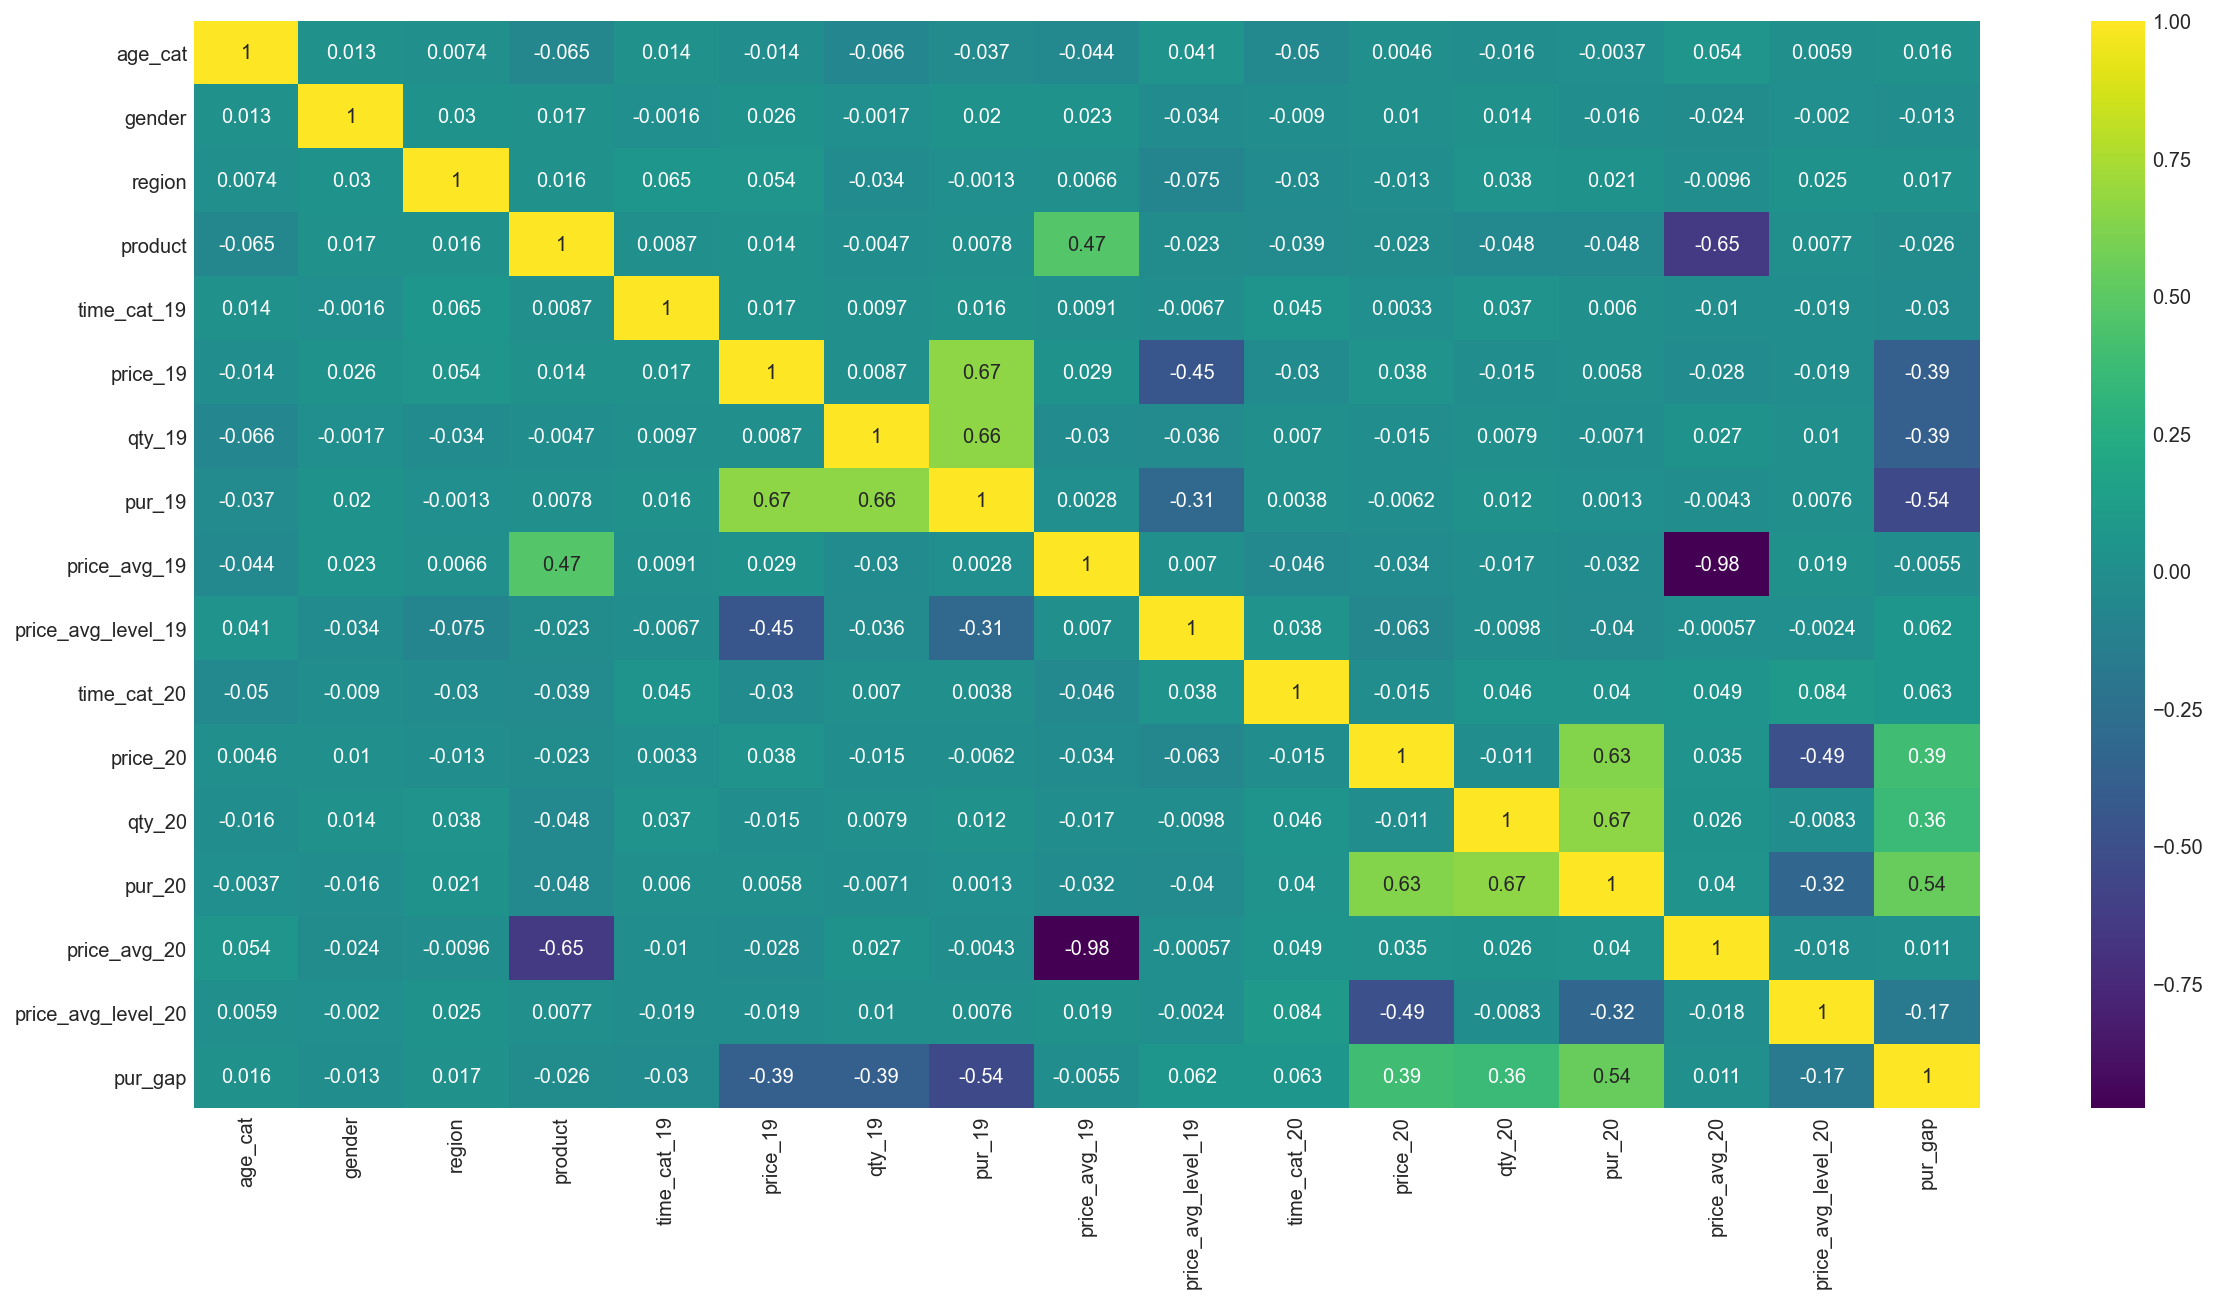

In [53]:
sns.heatmap(df.corr(), annot = True, cmap = 'viridis')

    워낙 상관계수들이 낮음. --> 난수로 만들어진 데이터라 그런듯 
    이것도 하나의 인사이트일까..
    데이터 수정이 필요함

## 데이터 수정

    역으로 인사이트를 먼저 결정하고 데이터를 수정하는게 좋을듯?
    1. product 2는 여성이 더 많이 구매한다.
    2. 남성은 19년도 보다 20년도에 더 많이 구매를 했다
    3. 나이가 많을 수록 구매를 적게한다.

In [54]:
df.groupby(['gender','product']).count()

age_cat  region  time_cat_19  price_19  qty_19  pur_19  \
gender product                                                           
0      1            180     180          180       180     180     180   
       2            160     160          160       160     160     160   
       3            150     150          150       150     150     150   
1      1            176     176          176       176     176     176   
       2            175     175          175       175     175     175   
       3            159     159          159       159     159     159   

                price_avg_19  price_avg_level_19  time_cat_20  price_20  \
gender product                                                            
0      1                 180                 180          180       180   
       2                 160                 160          160       160   
       3                 150                 150          150       150   
1      1                 176                 176          176       176   
       2                 175                 175          175       175   
       3                 159                 159          159       159   

                qty_20  pur_20  price_avg_20  price_avg_level_20  pur_gap  
gender product                                                             
0      1           180     180           180                 180      180  
       2           160     160           160                 160      160  
       3           150     150           150                 150      150  
1      1           176     176           176                 176      176  
       2           175     175           175                 175      175  
       3           159     159           159                 159      159

In [55]:
# for col in data['gender']:
#     data.loc[data.sample(frac=0.7).index,col] = 0

In [56]:
df.gender.value_counts()

1    510
0    490
Name: gender, dtype: int64